In [1]:
# Enable multiple output per cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# import library
from os import listdir
from os.path import isfile, join
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np
import csv

# Read mitigation data

In [3]:
data = pd.read_excel('Mitigation.xlsx')
data

,File_path,Sentence_ID,Sentence,Pair_ID,Drug1_Name,Drug2_Name,Drug_pair,Drug1_type,Drug2_type,DDI,DDI_Type,Mitigation (FC),Unnamed: 12,RM
0,15830476.xml,DDI-MedLine.d29.s2,"(1968, 1970), the higher serum concentrations ...",DDI-MedLine.d29.s2.p1,penicillins,probenecid,penicillins + probenecid,group,drug,True,mechanism,N,NaN,NaN
1,15830476.xml,DDI-MedLine.d29.s2,"(1968, 1970), the higher serum concentrations ...",DDI-MedLine.d29.s2.p2,cephaloridine,probenecid,cephaloridine + probenecid,drug,drug,True,mechanism,N,NaN,NaN
2,7756965.xml,DDI-MedLine.d68.s0,[The effect of cimetidine on the renal excreti...,DDI-MedLine.d68.s0.p12,cimetidine,verografine,cimetidine + verografine,drug,drug,True,mechanism,N,NaN,NaN
3,7756965.xml,DDI-MedLine.d68.s0,[The effect of cimetidine on the renal excreti...,DDI-MedLine.d68.s0.p13,cimetidine,iodamide,cimetidine + iodamide,drug,drug,True,mechanism,N,NaN,NaN
4,2857099.xml,DDI-MedLine.d27.s0,[The GABA-ergic system and brain edema] It has...,DDI-MedLine.d27.s0.p0,picrotoxin,diazepam,diazepam + picrotoxin,drug_n,drug,True,effect,N,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,11137650.xml,DDI-MedLine.d8.s6,"When combined with ofloxacin, KRM-1648 exhibit...",DDI-MedLine.d8.s6.p8,rifampicin,ofloxacin,ofloxacin + rifampicin,drug,drug,True,effect,N,NaN,NaN
228,11137650.xml,DDI-MedLine.d8.s6,"When combined with ofloxacin, KRM-1648 exhibit...",DDI-MedLine.d8.s6.p9,rifabutin,ofloxacin,ofloxacin + rifabutin,drug,drug,True,effect,N,NaN,NaN
229,2857198.xml,DDI-MedLine.d56.s5,When ouabain was applied to the muscle in the ...,DDI-MedLine.d56.s5.p0,ouabain,phentolamine,ouabain + phentolamine,drug,drug,True,effect,N,NaN,NaN
230,3967572.xml,DDI-MedLine.d7.s4,"With combined use, clinicians should be aware,...",DDI-MedLine.d7.s4.p0,phenytoin,theophylline,phenytoin + theophylline,drug,drug,True,effect,N,NaN,NaN


# Convert mitigation result to binary values

In [4]:
val_dict = {"N":0,"Y":1}
data["Miti_val"] = data["Mitigation (FC)"].map(val_dict)
data

,File_path,Sentence_ID,Sentence,Pair_ID,Drug1_Name,Drug2_Name,Drug_pair,Drug1_type,Drug2_type,DDI,DDI_Type,Mitigation (FC),Unnamed: 12,RM,Miti_val
0,15830476.xml,DDI-MedLine.d29.s2,"(1968, 1970), the higher serum concentrations ...",DDI-MedLine.d29.s2.p1,penicillins,probenecid,penicillins + probenecid,group,drug,True,mechanism,N,NaN,NaN,0
1,15830476.xml,DDI-MedLine.d29.s2,"(1968, 1970), the higher serum concentrations ...",DDI-MedLine.d29.s2.p2,cephaloridine,probenecid,cephaloridine + probenecid,drug,drug,True,mechanism,N,NaN,NaN,0
2,7756965.xml,DDI-MedLine.d68.s0,[The effect of cimetidine on the renal excreti...,DDI-MedLine.d68.s0.p12,cimetidine,verografine,cimetidine + verografine,drug,drug,True,mechanism,N,NaN,NaN,0
3,7756965.xml,DDI-MedLine.d68.s0,[The effect of cimetidine on the renal excreti...,DDI-MedLine.d68.s0.p13,cimetidine,iodamide,cimetidine + iodamide,drug,drug,True,mechanism,N,NaN,NaN,0
4,2857099.xml,DDI-MedLine.d27.s0,[The GABA-ergic system and brain edema] It has...,DDI-MedLine.d27.s0.p0,picrotoxin,diazepam,diazepam + picrotoxin,drug_n,drug,True,effect,N,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,11137650.xml,DDI-MedLine.d8.s6,"When combined with ofloxacin, KRM-1648 exhibit...",DDI-MedLine.d8.s6.p8,rifampicin,ofloxacin,ofloxacin + rifampicin,drug,drug,True,effect,N,NaN,NaN,0
228,11137650.xml,DDI-MedLine.d8.s6,"When combined with ofloxacin, KRM-1648 exhibit...",DDI-MedLine.d8.s6.p9,rifabutin,ofloxacin,ofloxacin + rifabutin,drug,drug,True,effect,N,NaN,NaN,0
229,2857198.xml,DDI-MedLine.d56.s5,When ouabain was applied to the muscle in the ...,DDI-MedLine.d56.s5.p0,ouabain,phentolamine,ouabain + phentolamine,drug,drug,True,effect,N,NaN,NaN,0
230,3967572.xml,DDI-MedLine.d7.s4,"With combined use, clinicians should be aware,...",DDI-MedLine.d7.s4.p0,phenytoin,theophylline,phenytoin + theophylline,drug,drug,True,effect,N,NaN,NaN,0


# Extract unique sentences

In [5]:
new_data = data.groupby(by = ["Sentence"])["Miti_val"].sum().to_frame().reset_index()
new_data
new_data.to_csv("mitigation_results.csv",index=False, encoding='utf-8')

,Sentence,Miti_val
0,"(1968, 1970), the higher serum concentrations ...",0
1,"ADL 8-2698, a trans-3,4-dimethyl-4-(3-hydroxyp...",1
2,ADL-8-2698 is a novel peripherally restricted ...,0
3,Acetaminophen diminished the binding of theoph...,0
4,Acid-catalyzed ethanolysis of temazepam in anh...,0
...,...,...
163,[The GABA-ergic system and brain edema] It has...,0
164,[The effect of cimetidine on the renal excreti...,0
165,"however, patients with moderate to severe card...",0
166,only ibogaine enhances cocaine-induced increas...,0


In [ ]:
with open("Mitigation_results.txt","w") as output_file:
    with open("Mitigation_results.csv", 'r', encoding='utf-8') as input_file:
        i = 0
        _ = output_file.write("index"+"\t"+"Sentence"+"\n")
        for row in csv.reader(input_file):
            # Skip saving the header
            if i == 0:
                i +=1
                continue
            _ = output_file.write(str(i)+"\t")
            _ = output_file.write("".join(row[0])+"\n")
            i +=1
        #_ =[output_file.write("".join(row[0])+"\n") for row in csv.reader(input_file)]

# Prediction results

In [7]:
miti_pred = pd.read_excel("GPT-pred.xlsx")
miti_pred

,Sentence,Miti_val,prediction
0,"ADL 8-2698, a trans-3,4-dimethyl-4-(3-hydroxyp...",1,1
1,Administering InsP(3) together with RR (100-50...,1,1
2,Both ibogaine and 18-MC block morphine-induced...,1,1
3,Cypermethrin-induced oxidative stress in rat b...,1,1
4,Cytochalasin D at 10 microM preferentially blo...,1,0
5,Dose-response curves (derived from the results...,1,1
6,Exogenous estradiol also appeared to influence...,1,0
7,Haloperidol reduced or eliminated the increase...,1,1
8,High-dose cisplatin with sodium thiosulfate pr...,1,1
9,"Ibogaine attenuates, but 18-MC potentiates, th...",1,0


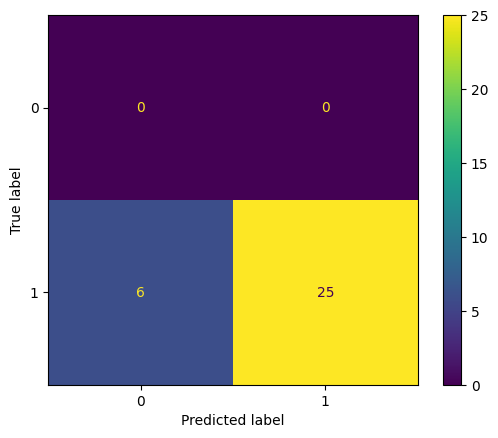

In [8]:
import matplotlib.pyplot as plt
from sklearn import metrics

actual = miti_pred.Miti_val
predicted = miti_pred.prediction

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()